In [1]:
using Plots

<center>
<h1>Coherent states</h1>
</center>

### What is a coherent state?

A coherent state is a quantum state of the harmonic oscillator (such as a light field) that have certain classical-like properties. These states are used in a variety of quantum mechanical settings, but are particularly important in quantum optics where they describe the light from a laser.

One key characteristic of coherent states is that they minimize the Heisenberg uncertainty principle for the quadrature components (amplitude and phase) of the light field. This means that they have the most well-defined phase and amplitude that is possible given the principles of quantum mechanics.

They are defined as an eigenstate $(\alpha )$ of the annihilation operator $a$. The annihilation operator (which represents the removal of a photon from the light field) is  a key component in the quantization of the electromagnetic field:

$$
a | \alpha \rangle = \alpha | \alpha \rangle
$$

where $\alpha$ is a complex number. 

$$
| \alpha \rangle = e^{-\frac{|\alpha|^2}{2}} \sum_{n=0}^{\infty} \frac{\alpha^n}{\sqrt{n!}} |n\rangle
$$


### Some properties of coherent states

1. They are normalized: $$\langle \alpha | \alpha \rangle = 1$$
2. They are quasi-orhtogonal: $$\langle \alpha | \beta \rangle = e^{-\frac{|\alpha - \beta|^2}{2}}$$
3. Average photon number: $$\langle \alpha | \underbrace{a^{\dagger} a}_{\hat N} | \alpha \rangle = |\alpha|^2$$
4. Variance in photon number: $$(\Delta n)^2 = \langle \alpha | \hat N^2 | \alpha \rangle - \langle \alpha | \hat N | \alpha \rangle^2 = |\alpha|^2$$


### Photon number distribution

Now we can try to compute the probability of finding $n$ photons in a coherent state $|\alpha \rangle$. This is given by:

$$
P(n) = |\langle n | \alpha \rangle|^2 = \frac{|\alpha|^{2n}}{n!} e^{-|\alpha|^2} = \frac{e^{-\bar n\bar n^n}}{n!} 
$$

Let us see how this **Poissonian** distribution looks like for different values of $\bar n$:

┌ Info: Saved animation to /tmp/jl_6FePMVE9QZ.gif
└ @ Plots /home/jose/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_6FePMVE9QZ.gif")
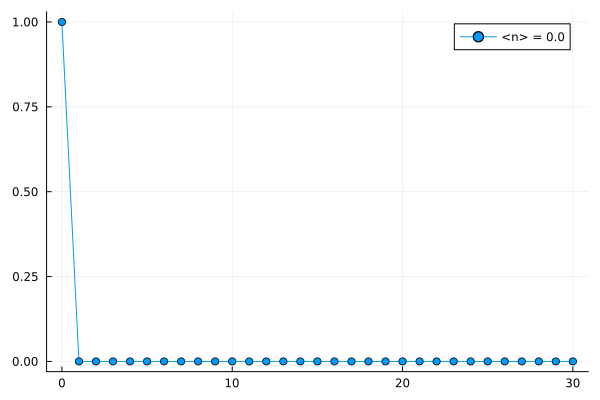

In [5]:
function P(n, bar_n)
    return exp(-bar_n) * bar_n^n / factorial(big(n))
end

function plot_P(bar_n)
    n = 0:30
    p = P.(n, bar_n)
    plot(n, p, marker=:circle, label="<n> = $bar_n")
end

@gif for bar_n in 0:0.1:20
    plot_P(bar_n)
end

We can see that the distribution is peaked around the mean value, and that the width of the distribution is proportional to the mean value, and as we increase the mean value, the distribution becomes more and more like a Gaussian.

### Expectation value of the electric field

We can also compute the expectation value of the electric field in a coherent state:

$$
\langle \alpha | \hat E(\xi) | \alpha \rangle = \langle \alpha | \sqrt{\frac{\hbar \omega}{2 \epsilon_0 V}} \hat a + \sqrt{\frac{\hbar \omega}{2 \epsilon_0 V}} \hat a^{\dagger} | \alpha \rangle = \sqrt{\frac{\hbar \omega}{2 \epsilon_0 V}} \langle \alpha | \hat a | \alpha \rangle + \sqrt{\frac{\hbar \omega}{2 \epsilon_0 V}} \langle \alpha | \hat a^{\dagger} | \alpha \rangle \\= |\alpha| \cos(\xi - theta)
$$

Where we have used the fact that $\langle \alpha | \hat a | \alpha \rangle = \alpha$, $\langle \alpha | \hat a^{\dagger} | \alpha \rangle = \alpha^*$, and that $\alpha \equiv |\alpha| e^{i \theta}$. 
The variance in the electric field is given by:

$$
(\Delta E)^2 = \langle \alpha | \hat E^2 | \alpha \rangle - \langle \alpha | \hat E | \alpha \rangle^2 = 1/4
$$

This means that the electric field in a coherent state is a classical field, and as we can see from the expression above, the variance in the electric field is independent of the mean photon number. A simple result from this is that as the magnitude of the electric field increases, the phase uncertainty relative importance decreases:

┌ Info: Saved animation to /tmp/jl_0VSz6ZgD6l.gif
└ @ Plots /home/jose/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_0VSz6ZgD6l.gif")
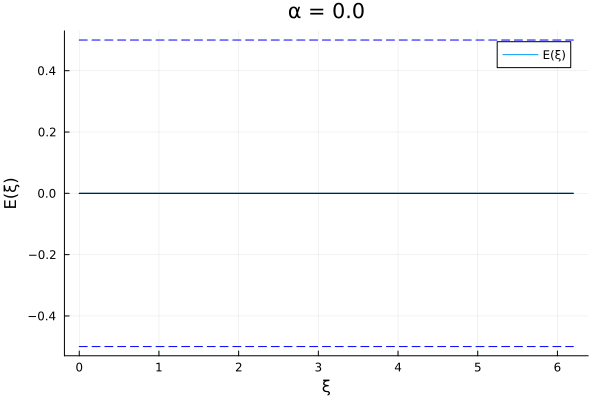

In [16]:
function simple_E(A,ξ)
    return A * cos(ξ)
end

function plot_simple_E(A)
    ξ = 0:0.1:2π
    E = simple_E.(A, ξ)
    plot(ξ, E, title="α = $A", label="E(ξ)", xlabel="ξ", ylabel="E(ξ)",)
    # Plot minimum 
    plot!(ξ, E .+ 1/2, label="", color=:blue, linestyle=:dash)
    plot!(ξ, E .- 1/2, label="", color=:blue, linestyle=:dash)
    # Horizontal line
    plot!(ξ, 0*ξ, label="", color=:black)
end

@gif for A in 0:0.1:10
    plot_simple_E(A)
end

### The energy of a coherent state

It is quite straightforward to compute the energy of a coherent state:

$$
\langle \alpha | \hat H | \alpha \rangle = \hbar \omega \langle \alpha | \hat a^{\dagger} \hat a | \alpha \rangle = \hbar \omega (\bar n + 1/2)
$$

The fluctuations in the energy are given by a very similar expression:

$$
(\Delta H)^2 = \langle \alpha | \hat H^2 | \alpha \rangle - \langle \alpha | \hat H | \alpha \rangle^2 = \hbar^2 \omega^2 |\alpha|^2
$$


# Quadrature components of the electric field

The classical electric field can be written as:

$$
\hat E(\xi) = E_0 \cos(\overbrace{\omega t - \theta}^\xi) = E_0 \cos(\theta) \cos(\omega t) + E_0 \sin(\theta) \sin(\omega t) = E_0 \cos(\theta) \hat X + E_0 \sin(\theta) \hat Y
$$

$$
E = (X + i Y) e^{i \omega t}
$$

we'll be calling $\hat X$ and $\hat Y$ the quadrature components of the electric field. Thus, we can also write the operators $\hat X$ and $\hat Y$ in terms of the annihilation and creation operators:

$$X = \frac{1}{2} (\hat a + \hat a^{\dagger}) \quad \quad Y = \frac{1}{2i} (\hat a - \hat a^{\dagger})$$

Surprisingly, the quadrature components of the electric field $X$ and $Y$ are proportional to the position and momentum operators of the harmonic oscillator. This means that the quadrature components of the electric field are conjugate variables.

## Displacement operator

We can define a displacement operator $D(\alpha)$ that displaces the state of the harmonic oscillator by $\alpha$:

$$
|\alpha\rangle =D(\alpha) |0\rangle \quad \Rightarrow \quad D(\alpha) = e^{\alpha \hat a^{\dagger} - \alpha^* \hat a}
$$

Note that the displacement operator is unitary, and that it is a function of the annihilation and creation operators.

In [73]:
function plot_orbit(θ, r)
    x = r * cos(θ)
    y = r * sin(θ)
    p1 = scatter([x], [y], label="", color=:blue, marker=:circle, markersize=10,
    xlabel="X", ylabel="Y", title="Quadrature phase space")
    # Line from origin to point
    plot!(p1, [0, x], [0, y], label="", color=:black, xlims=(-1.2, 1.2), ylims=(-1.2, 1.2))
    return p1
end

function plot_cos(θ)
    # Light line on previous values
    ys = sin.(0:0.1:θ)
    p2 = plot(0:0.1:θ, ys, label="", color=:blue, linestyle=:dash)
    plot!(0:0.1:θ, ys.-0.09, label="", linestyle=:dash, xlabel="ξ", ylabel="E(ξ)", title="Electric field", color=:red)
    plot!(0:0.1:θ, ys.+0.09, label="ΔE", linestyle=:dash, xlims=(0., 4π), ylims=(-1.2, 1.2), color=:red,)
    # Plot current value
    scatter!(p2, [θ], [sin(θ)], label="", color=:blue, marker=:circle, markersize=10)
    return p2
end

plot_cos (generic function with 1 method)

┌ Info: Saved animation to /tmp/jl_o3mVqvwvIJ.gif
└ @ Plots /home/jose/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_o3mVqvwvIJ.gif")
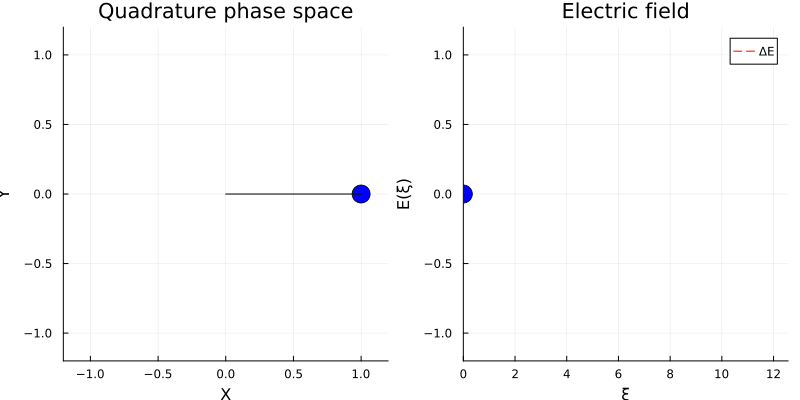

In [74]:
@gif for θ in 0:0.1:4π
    p1 = plot_orbit(θ, 1)
    p2 = plot_cos(θ)
    plot(p1, p2, layout=(1,2), size=(800, 400))
end